In [1]:
###··· BANK DATASET ···### 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# Part 1: Selecting and analyzing the dataset 
# #Load the dataset
bank_dataset = pd.read_csv("A2-bank/bank-additional.csv", sep=';', header=0)
#Drop unnused columns
bank_dataset.drop(["default", "day_of_week","pdays"], axis=1, inplace=True)

#Replace unknown values with the mode
for column in ["marital", "job", "education", "housing", "loan"]:
    bank_dataset[column].replace("unknown", bank_dataset[column].mode()[0], inplace=True)

#Give a numerical value to the categorical data
columns_to_factorize = ["job", "marital", "education", "housing", "loan", "contact", "month", "poutcome", "y"]
for column in columns_to_factorize:
    bank_dataset[column], _ = pd.factorize(bank_dataset[column])


x_train = bank_dataset[["job", "marital", "education", "housing", "loan", "contact", "month", "duration", "campaign", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
y_train = bank_dataset[["y"]]

# Scale the dat
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_train, x_test, y_train, y_test = train_test_split(x_train_scaled, y_train, test_size=0.2, shuffle=True)

In [5]:
import tensorflow as tf
from tensorflow import keras as keras
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from scikeras.wrappers import KerasClassifier
tf.get_logger().setLevel('ERROR')

# Create the model
model = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=(x_train.shape[1],), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cv_model = KerasClassifier(model=model, verbose=0)
# Perform cross-validation
grid = GridSearchCV(estimator=cv_model,
                    param_grid= {'epochs' : [20,50], 'optimizer__learning_rate': [0.1, 0.01, 0.001], 'optimizer__momentum' :[0.0, 0.1, 0.01, 0.001]},
                    cv=5, 
                    scoring='accuracy')
grid_result = grid.fit(x_train, y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(grid_result.mean())

plt.plot(grid_result, marker='o')
plt.title('Model accuracy (Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.show()

---Train---
Accuracy Score:  0.9143247344461305
---Test---
Accuracy Score:  0.9081087642631707
[[7014  270]
 [ 487  467]]


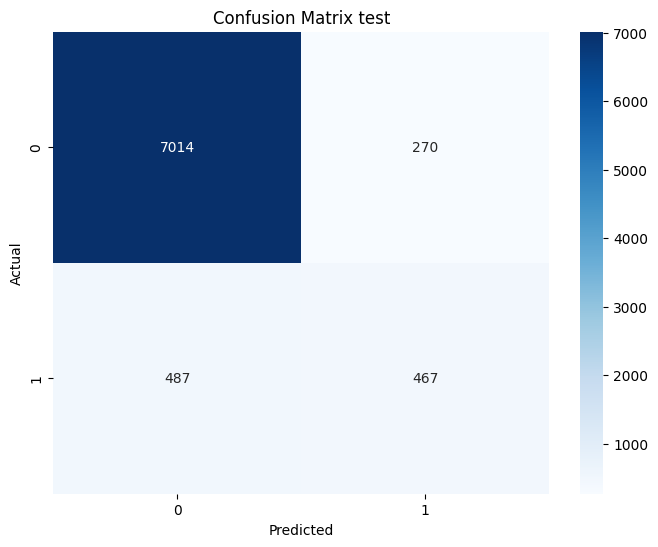

In [ ]:
from sklearn.metrics import *
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
import numpy as np

# Part 3: Obtaining predictions
y_train_pred = (model.predict(x_train, verbose=0)[:, 0] > 0.5).astype(np.int8)
y_test_pred = (model.predict(x_test, verbose=0)[:, 0] > 0.5).astype(np.int8)
print("---Train---")
print("Accuracy Score: ", accuracy_score(y_train, y_train_pred))
print("---Test---")
print("Accuracy Score: ", accuracy_score(y_test, y_test_pred))

# Generate the confusion matrix

confusion = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
print(confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix test')
plt.show()


